In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)

## Load Raw Dataset

In [25]:
# Load dataset
df = pd.read_csv('../../data/raw/wwlLancMsc_data.csv', low_memory=False)
print(f"Full dataset shape: {df.shape}")

# Select last 20 columns for EDA
df_my = df.iloc[:, -20:].copy()
print(f"\nSelected columns shape: {df_my.shape}")
print(f"\nSelected columns: {list(df_my.columns)}")

df_my.head()

Full dataset shape: (41846, 101)

Selected columns shape: (41846, 20)

Selected columns: ['chronic_condition_obesity_flag', 'chronic_condition_respiratory_flag', 'frailty_score', 'Arrival_Date', 'arrival_date_time', 'attendancetype', 'initial_assessment_date_time', 'sex_description.y', 'arrival_mode_description', 'place_of_incident', 'source_of_ref_description', 'presenting_complaint', 'acuity_code', 'inj_or_ail', 'NEWS2', 'attend_dis_description', 'ae_unplanned_attendance', 'location', 'ID', 'Deprivation Decile']


,chronic_condition_obesity_flag,chronic_condition_respiratory_flag,frailty_score,Arrival_Date,arrival_date_time,attendancetype,initial_assessment_date_time,sex_description.y,arrival_mode_description,place_of_incident,source_of_ref_description,presenting_complaint,acuity_code,inj_or_ail,NEWS2,attend_dis_description,ae_unplanned_attendance,location,ID,Deprivation Decile
0,0,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49591,3
1,0,0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25760,10
2,0,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159753,3
3,0,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76679,4
4,0,0,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2617,9


## Basic Dataset Information

In [26]:
print("Info")
df_my.info()

print("\n")
print("Summary statistics")
df_my.describe()

# Missing values
print("\n")
print("Missing Values (%)")
missing = df_my.isna().mean().sort_values(ascending=False) * 100
print(missing)

# Empty columns
empty_cols = [c for c in df_my.columns if df_my[c].isna().sum() == len(df_my)]
print(f"\nCompletely empty columns: {empty_cols}")

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41846 entries, 0 to 41845
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   chronic_condition_obesity_flag      41846 non-null  int64  
 1   chronic_condition_respiratory_flag  41846 non-null  int64  
 2   frailty_score                       41846 non-null  object 
 3   Arrival_Date                        11464 non-null  object 
 4   arrival_date_time                   11464 non-null  object 
 5   attendancetype                      11464 non-null  object 
 6   initial_assessment_date_time        11464 non-null  object 
 7   sex_description.y                   11464 non-null  object 
 8   arrival_mode_description            11464 non-null  object 
 9   place_of_incident                   11378 non-null  object 
 10  source_of_ref_description           11464 non-null  object 
 11  presenting_complaint                

## EDA: Binary Columns

Binary columns: ['chronic_condition_obesity_flag', 'chronic_condition_respiratory_flag', 'sex_description.y', 'inj_or_ail', 'ae_unplanned_attendance']

Column: chronic_condition_obesity_flag
chronic_condition_obesity_flag
0    36450
1     5396
Name: count, dtype: int64

Column: chronic_condition_respiratory_flag
chronic_condition_respiratory_flag
0    37175
1     4671
Name: count, dtype: int64

Column: sex_description.y
sex_description.y
NaN       30382
Female     6040
Male       5424
Name: count, dtype: int64

Column: inj_or_ail
inj_or_ail
NaN        31824
Ailment     9194
Injury       828
Name: count, dtype: int64

Column: ae_unplanned_attendance
ae_unplanned_attendance
NaN    30382
1.0    11464
Name: count, dtype: int64


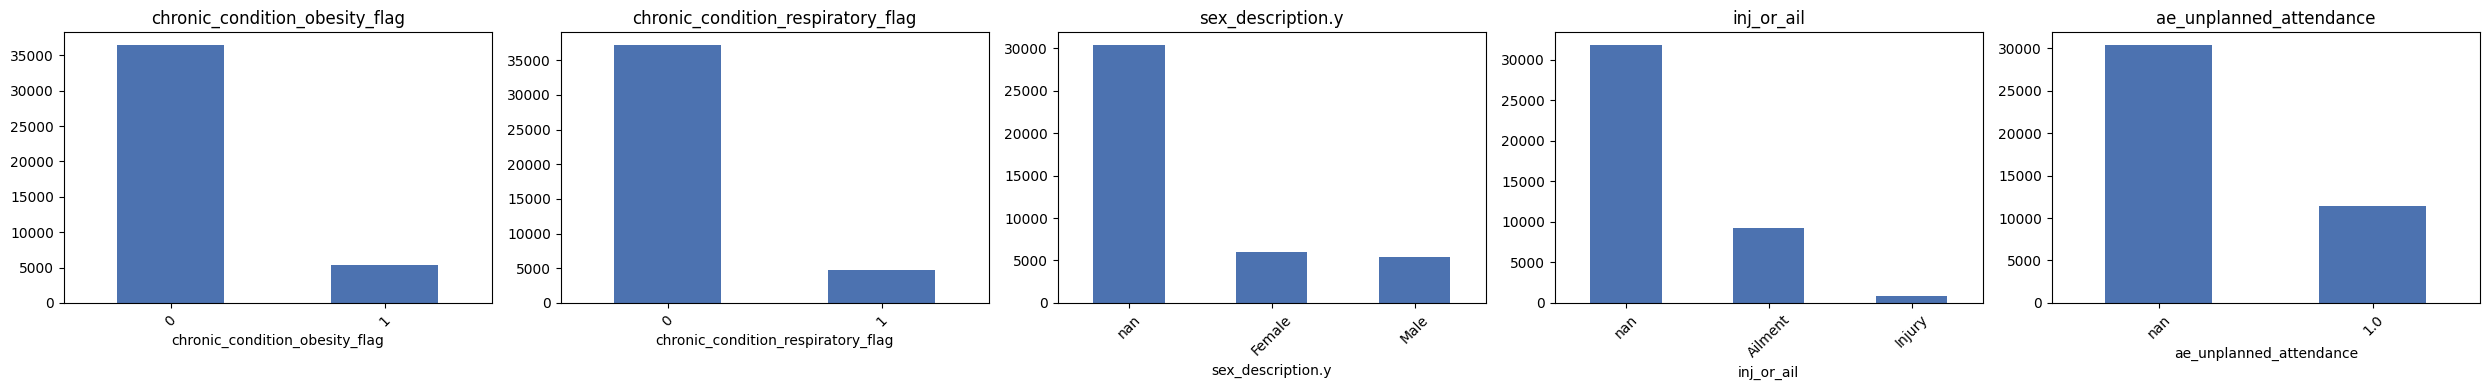

In [27]:
# Columns with <= 2 unique values
binary_cols = [col for col in df_my.columns if df_my[col].nunique(dropna=True) <= 2]
print(f"Binary columns: {binary_cols}")

# Value counts
for col in binary_cols:
    print("\n" + "="*60)
    print(f"Column: {col}")
    print(df_my[col].value_counts(dropna=False))

# Plot
if binary_cols:
    fig, axes = plt.subplots(1, len(binary_cols), figsize=(5*len(binary_cols), 4))
    if len(binary_cols) == 1:
        axes = [axes]
    for i, col in enumerate(binary_cols):
        df_my[col].value_counts(dropna=False).plot(kind='bar', ax=axes[i], color=['#4C72B0'])
        axes[i].set_title(col)
        axes[i].tick_params(axis='x', rotation=45)
    plt.tight_layout()

## EDA: Frailty Score

FRAILTY SCORE
Unique sample: ['2' '6' '4' '8' '10' '3' '2 - Well' '3 - Managing Well' '5' '7'
 '4 - Vulnerable' '1' '5 - Mildly Frail' '9' '6 - Moderately Frail'
 '7 - Severely Frail' '1 - Very Fit' '8 - Very Severely Frail'
 '9 - Terminally Ill']
frailty_score
4     3517
5     3380
9     3377
10    3374
6     3360
Name: count, dtype: int64
count     41846
unique       19
top           4
freq       3517
Name: frailty_score, dtype: object


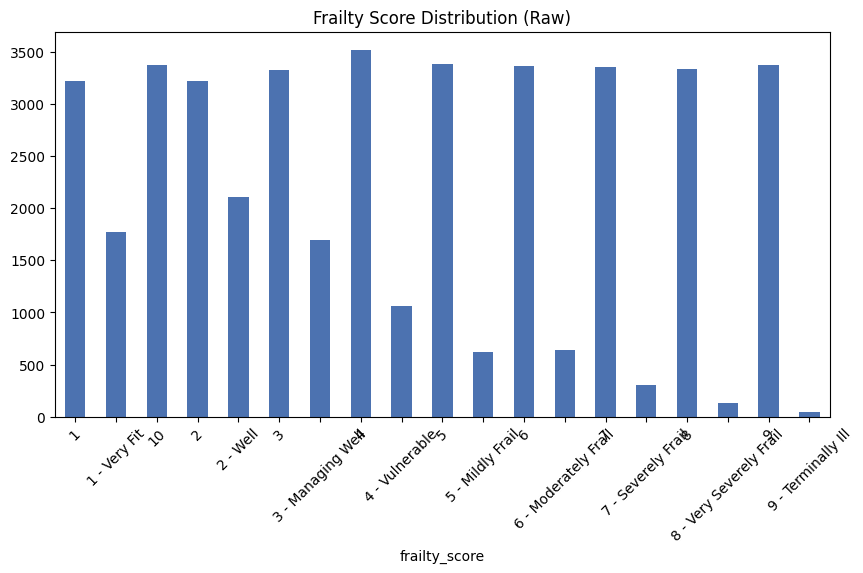

In [28]:
col = 'frailty_score'

print("FRAILTY SCORE")

print(f"Unique sample: {df_my[col].unique()[:20]}")
print(df_my[col].value_counts(dropna=False).head())
print(df_my[col].describe())

# Plot
plt.figure(figsize=(10,5))
df_my[col].value_counts(dropna=False).sort_index().plot(kind='bar', color='#4C72B0')
plt.title("Frailty Score Distribution (Raw)")
plt.xticks(rotation=45)
plt.show()

Cleaning

In [29]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
from category_encoders import CatBoostEncoder
from sklearn.model_selection import KFold

input_path = Path("../../data/raw/wwlLancMsc_data.csv")
output_path = Path("../../data/processed/merge_Sophie_col_80_100.csv")

df = pd.read_csv(input_path)
last_20_cols = df.columns[-20:].tolist()
df_my = df[last_20_cols].copy()

target_col = "spell_episode_los" 
if target_col in df.columns:
    df_my[target_col] = df[target_col]
    target = df_my[target_col]
else:
    target = None

# PROCESSING 

# 1. chronic_condition_obesity_flag
if "chronic_condition_obesity_flag" in df_my.columns:
    df_my["chronic_condition_obesity_flag"] = df_my["chronic_condition_obesity_flag"].replace(["NA"], np.nan)
    df_my["chronic_condition_obesity_flag"] = df_my["chronic_condition_obesity_flag"].astype("Int64")

# 2. chronic_condition_respiratory_flag
if "chronic_condition_respiratory_flag" in df_my.columns:
    df_my["chronic_condition_respiratory_flag"] = df_my["chronic_condition_respiratory_flag"].replace(["NA"], np.nan)
    df_my["chronic_condition_respiratory_flag"] = df_my["chronic_condition_respiratory_flag"].astype("Int64")

# 3. frailty_score
if "frailty_score" in df_my.columns:
    df_my["frailty_score"] = (
        df_my["frailty_score"]
        .astype(str)
        .str.extract(r"(\d+)")[0]
        .astype(float)
    )

# 4. Arrival_Date - will be deleted after arrival_date_time processing
# 5. arrival_date_time
if "arrival_date_time" in df_my.columns and "Arrival_Date" in df_my.columns:#
    
    # Parse Arrival_Date
    df_my["Arrival_Date"] = pd.to_datetime(df_my["Arrival_Date"], errors="coerce")
    
    # Read raw arrival_date_time from original file
    raw = pd.read_csv(
        input_path,
        usecols=["arrival_date_time"],
        dtype=str
    ).loc[df_my.index, "arrival_date_time"].astype(str).str.strip()
    
    # Parse with both date formats
    adt_dayfirst = pd.to_datetime(raw, dayfirst=True, errors="coerce")
    adt_monthfirst = pd.to_datetime(raw, dayfirst=False, errors="coerce")
    
    # Initialize final series
    final = pd.Series(pd.NaT, index=df_my.index, dtype='datetime64[ns]')
    
    # Match day-first format with Arrival_Date
    mask_match_day = (
        df_my["Arrival_Date"].notna() & adt_dayfirst.notna() &
        (adt_dayfirst.dt.date == df_my["Arrival_Date"].dt.date)
    )
    final[mask_match_day] = adt_dayfirst[mask_match_day]
    
    # Match month-first format with Arrival_Date
    mask_match_month = (
        df_my["Arrival_Date"].notna() & adt_monthfirst.notna() &
        final.isna() &
        (adt_monthfirst.dt.date == df_my["Arrival_Date"].dt.date)
    )
    final[mask_match_month] = adt_monthfirst[mask_match_month]
    
    # Fill remaining with best guess
    remaining = final.isna()
    final[remaining] = adt_dayfirst[remaining].combine_first(adt_monthfirst[remaining])
    
    df_my["arrival_date_time"] = final
    
    # Check for mismatches
    mismatch_df = df_my[
        df_my["Arrival_Date"].notna() &
        df_my["arrival_date_time"].notna() &
        (df_my["Arrival_Date"].dt.date != df_my["arrival_date_time"].dt.date)
    ]
    
    def month_to_season(month):
        if month in [12, 1, 2]:
            return 1 #"Winter"
        elif month in [3, 4, 5]:
            return 2 # "Spring"
        elif month in [6, 7, 8]:
            return 3 # "Summer"
        elif month in [9, 10, 11]:
            return 4 # "Autumn"
        return None

    df_my["season_of_the_admission"] = (
        df_my["arrival_date_time"]
        .dt.month
        .apply(month_to_season)
    )
    df_my["season_of_the_admission"] = df_my["season_of_the_admission"].replace(["NA"], np.nan)
    df_my["season_of_the_admission"] = df_my["season_of_the_admission"].replace([np.nan], -1)

    df_my = df_my.drop(columns=["Arrival_Date", "arrival_date_time"])


# 6. attendancetype
if "attendancetype" in df_my.columns:
    df_my["attendancetype"] = df_my["attendancetype"].fillna("Unknown")
    le_attendance = LabelEncoder()
    df_my["attendancetype"] = le_attendance.fit_transform(df_my["attendancetype"])

# 7. initial_assessment_date_time - Delete
if "initial_assessment_date_time" in df_my.columns:
    df_my = df_my.drop(columns=["initial_assessment_date_time"])

# 8. sex_description.y - Delete
if "sex_description.y" in df_my.columns:
    df_my = df_my.drop(columns=["sex_description.y"])

# 9. arrival_mode_description
if "arrival_mode_description" in df_my.columns:
    df_my["arrival_mode_description"] = df_my["arrival_mode_description"].replace(["NA", 0], np.nan)
    df_my["arrival_mode_description"] = df_my["arrival_mode_description"].fillna("Unknown")
    le_arrival_mode = LabelEncoder()
    df_my["arrival_mode_description"] = le_arrival_mode.fit_transform(df_my["arrival_mode_description"])

# 10. place_of_incident
if "place_of_incident" in df_my.columns:
    df_my["place_of_incident"] = df_my["place_of_incident"].fillna("Unknown")
    le_place = LabelEncoder()
    df_my["place_of_incident"] = le_place.fit_transform(df_my["place_of_incident"])

# 11. source_of_ref_description
if "source_of_ref_description" in df_my.columns:
    df_my["source_of_ref_description"] = df_my["source_of_ref_description"].fillna("Unknown")
    le_source = LabelEncoder()
    df_my["source_of_ref_description"] = le_source.fit_transform(df_my["source_of_ref_description"])

# 12. presenting_complaint - CatBoost encoding
if "presenting_complaint" in df_my.columns:
    df_my["presenting_complaint"] = df_my["presenting_complaint"].fillna("Unknown")
    
    if target is not None:
        # Out-of-fold CatBoost encoding
        k_folds = KFold(n_splits=5, shuffle=True, random_state=98)
        oof_values = pd.Series(index=df_my.index, dtype=float)
        
        for tr_index, val_index in k_folds.split(df_my):
            encoder = CatBoostEncoder(cols=["presenting_complaint"], a=20.0)
            encoder.fit(
                df_my.iloc[tr_index][["presenting_complaint"]], 
                target.iloc[tr_index]
            )
            oof_values.iloc[val_index] = encoder.transform(
                df_my.iloc[val_index][["presenting_complaint"]]
            )["presenting_complaint"]
        
        df_my["presenting_complaint_encoded"] = oof_values
        
        # Add frequency count
        freq = df_my["presenting_complaint"].map(df["presenting_complaint"].value_counts())
        df_my["presenting_complaint_count"] = freq
        df_my["presenting_complaint_count"] = df_my["presenting_complaint_count"].replace(["NA"], np.nan)
        df_my["presenting_complaint_count"] = df_my["presenting_complaint_count"].replace([np.nan], -1)
        
        # Add rare flag (categories with less than 10 occurrences)
        df_my["presenting_complaint_is_rare"] = (freq < 10).astype(int)
        
        # Drop original column after encoding
        df_my = df_my.drop(columns=["presenting_complaint"])
    else:
        print("  Skipping CatBoost encoding (no target variable)")
        # Keep as categorical for CatBoost - no encoding needed

# 13. acuity_code
if "acuity_code" in df_my.columns:
    print(df_my["acuity_code"].unique())
    print(df_my["acuity_code"].describe())
    df_my["acuity_code"] = df_my["acuity_code"].replace(["NA"], np.nan)
    df_my["acuity_code"] = df_my["acuity_code"].replace([np.nan], -1)
    print(df_my["acuity_code"].unique())
    df_my["acuity_code"] = pd.to_numeric(df_my["acuity_code"], errors="coerce")

# 14. inj_or_ail - Delete
if "inj_or_ail" in df_my.columns:
    df_my["inj_or_ail"] = df_my["inj_or_ail"].fillna("Unknown")
    le_source = LabelEncoder()
    df_my["inj_or_ail"] = le_source.fit_transform(df_my["inj_or_ail"])

# 15. attend_dis_description - Delete
if "attend_dis_description" in df_my.columns:
    df_my = df_my.drop(columns=["attend_dis_description"])

# 16. ae_unplanned_attendance
if "ae_unplanned_attendance" in df_my.columns:
    df_my["ae_unplanned_attendance"] = df_my["ae_unplanned_attendance"].fillna(0).astype(int)

# 17. location - CatBoost encoding
if "location" in df_my.columns:
    df_my["location"] = df_my["location"].fillna("Unknown")
    le_source = LabelEncoder()
    df_my["location"] = le_source.fit_transform(df_my["location"])

# 18. ID - delete
    df_my = df_my.drop(columns=["ID"])

# 19. Deprivation Decile
if "Deprivation Decile" in df_my.columns:
    df_my["Deprivation Decile"] = pd.to_numeric(df_my["Deprivation Decile"], errors="coerce").astype("Int64")

# 20. NEWS2
if "NEWS2" in df_my.columns:
    df_my["NEWS2_missing"] = df_my["NEWS2"].isna().astype("int64")
    df_my["NEWS2"] = df_my["NEWS2"].replace(["NA", "NaN", "", 0], np.nan)
    df_my["NEWS2"] = df_my["NEWS2"].fillna(-1).astype("int64")



if target_col in df_my.columns and target_col not in last_20_cols:
    print(f"\nRemoving target column '{target_col}' before saving...")
    df_my = df_my.drop(columns=[target_col])

df_my.to_csv(output_path, index=False)

print(f"Processing complete! Output shape: {df_my.shape}")
print(f"\nProcessed columns: {list(df_my.columns)}")
print(f"\nData types:\n{df_my.dtypes}")

/var/folders/vw/3ry2l6hs6qz2yjr9tcj8bq6c0000gp/T/ipykernel_67868/1807801176.py:11: DtypeWarning: Columns (58) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_path)


[nan  3.  4.  2.  1.  5.]
count    11017.000000
mean         2.744849
std          0.623447
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: acuity_code, dtype: float64
[-1.  3.  4.  2.  1.  5.]

Removing target column 'spell_episode_los' before saving...
Processing complete! Output shape: (41846, 18)

Processed columns: ['chronic_condition_obesity_flag', 'chronic_condition_respiratory_flag', 'frailty_score', 'attendancetype', 'arrival_mode_description', 'place_of_incident', 'source_of_ref_description', 'acuity_code', 'inj_or_ail', 'NEWS2', 'ae_unplanned_attendance', 'location', 'Deprivation Decile', 'season_of_the_admission', 'presenting_complaint_encoded', 'presenting_complaint_count', 'presenting_complaint_is_rare', 'NEWS2_missing']

Data types:
chronic_condition_obesity_flag          Int64
chronic_condition_respiratory_flag      Int64
frailty_score                         float64
attendancetype                      